## Part A

### Importing Libraries 

Do NOT import any other libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Impementing PCA

In [2]:
def PCA(X , n_components=3):
    # TODO
    X_meaned = X - np.mean(X , axis = 0)

    cov_mat = np.cov(X_meaned , rowvar = False)

    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    eigenvector_subset = sorted_eigenvectors[:,0:n_components]

    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

### Reading `sample1.jpg`

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
img = cv.imread('/content/drive/MyDrive/Machine Learning/HW5/sample1.jpg')
RBG_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
RBG_img.shape

(225, 225, 3)

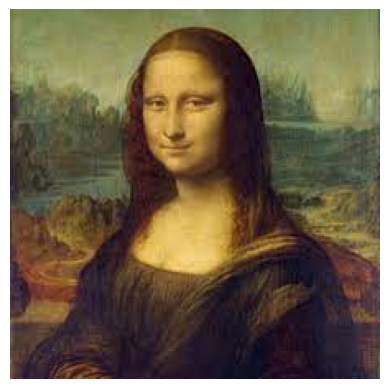

In [5]:
plt.imshow(RBG_img)
plt.axis('off')
plt.show()

### Appling PCA on `sample1.jpg`

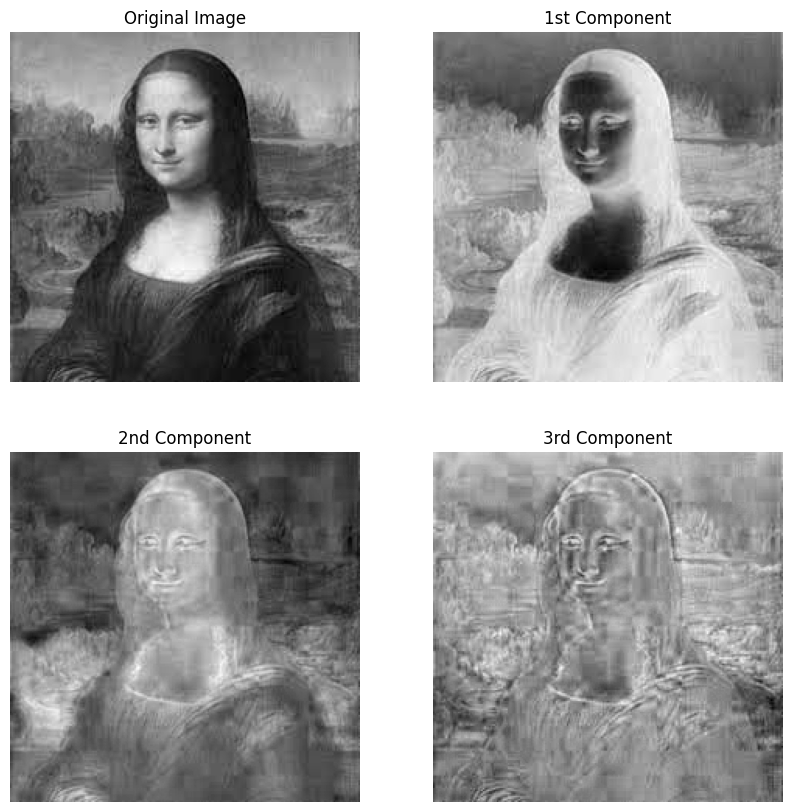

In [6]:
# TODO
# Convert the pixels of RGB image of size (w, h, c) to a vector of dimention (h*w, c)
w, h, c = RBG_img.shape
data = RBG_img.reshape(w * h, c)

# Apply PCA on data
transformed_data = PCA(data)

# convert transformed_data to the original image shape
transformed_img = transformed_data.reshape(w, h, c)



fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(gray_img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Plot 1st component
ax[0, 1].imshow(transformed_img[:,:,0], cmap='gray')
ax[0, 1].set_title('1st Component')
ax[0, 1].axis('off')

# Plot 2nd component
ax[1, 0].imshow(transformed_img[:,:,1], cmap='gray')
ax[1, 0].set_title('2nd Component')
ax[1, 0].axis('off')

# Plot 3rd component
ax[1, 1].imshow(transformed_img[:,:,2], cmap='gray')
ax[1, 1].set_title('3rd Component')
ax[1, 1].axis('off')

plt.axis('off')
plt.show()

## Part B

### Importing Libraries 

Do NOT import any other libraries

In [7]:
import tifffile
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Reading `DC.tif`

In [8]:
dc = tifffile.imread('/content/drive/MyDrive/Machine Learning/HW5/DC.tif')
dc = dc.astype(np.float64)
dc.shape

(191, 1280, 307)

### Utelity Functions

In [9]:
def show_img(x, cmap=None):
    fig, ax = plt.subplots(figsize=(20, 20))
    if cmap == None:
        plt.imshow(cv.flip(cv.rotate(x, cv.ROTATE_90_COUNTERCLOCKWISE), 0))
    else:
        plt.imshow(cv.flip(cv.rotate(x, cv.ROTATE_90_COUNTERCLOCKWISE), 0), cmap)
    plt.axis('off')
    plt.show()

In [10]:
def normalize(x, contrast=1.0):
    x[x < 0] = 0
    x /= x.max()
    return x * contrast # for more contrast

### Extracting  RGB Channels

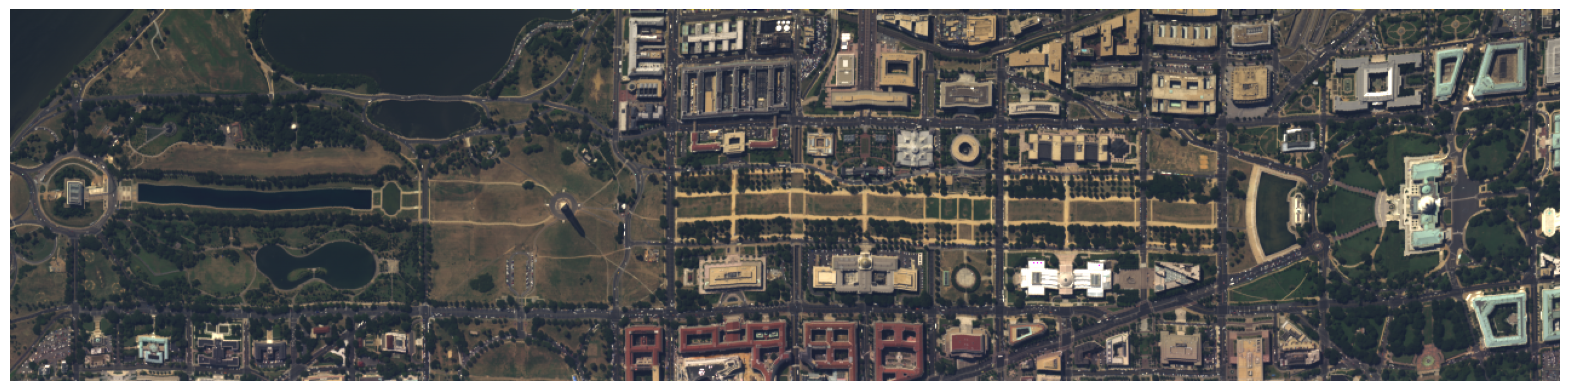

In [11]:
# TODO
G = dc[34]       # 549 nm
R = dc[43]       # 612 nm
B = dc[17]       # 464 nm

[R, G, B] = map(lambda x: normalize(x, 2.3), [R, G, B])

# Stack R, G, B channels to create RGB image
RGB_img = np.stack((R, G, B), axis=2)
show_img(RGB_img)

### PCA

#### 3 Channels PCA

In [12]:
img = dc.transpose((1 , -1 , 0)) 
w, h, c = img.shape      
data = img.reshape(w * h, c)
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(data)
transformed_img = transformed_data.reshape(w, h, 3)
PCA_3comp = transformed_img.copy()
transformed_img.shape

(1280, 307, 3)

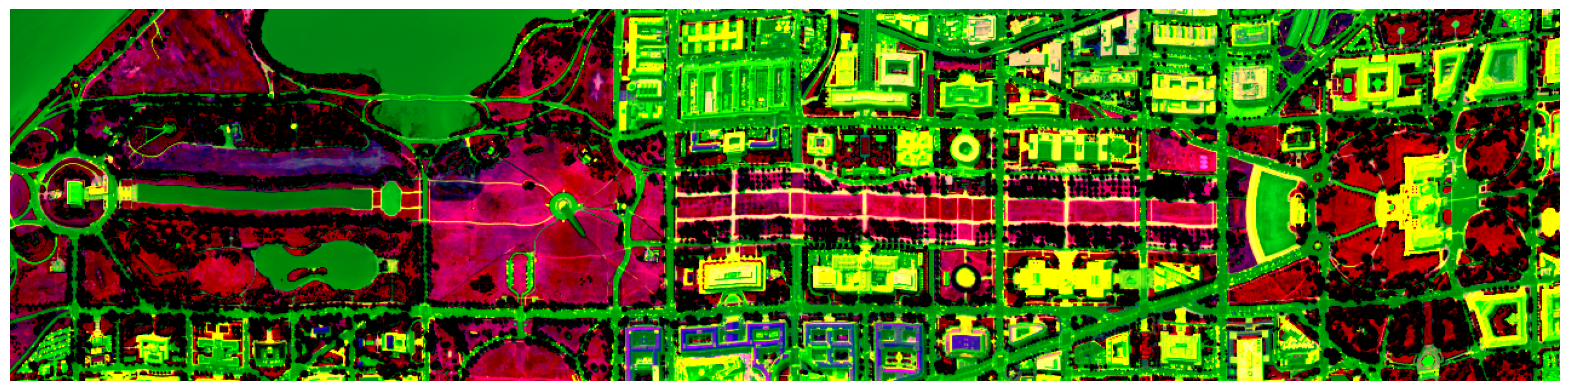

In [13]:
(C1, C2, C3) = (transformed_img[:, :, 0], transformed_img[:, :, 1], transformed_img[:, :, 2])

[C1, C2, C3] = map(lambda x: normalize(x, 8.0), [C1, C2, C3])

three_channel = RGB_img = np.stack((C1, C2, C3), axis=2)

show_img(three_channel)

#### 1 Channels PCA

In [14]:
img = dc.transpose((1 , -1 , 0)) 
w, h, c = img.shape      
data = img.reshape(w * h, c)
pca = PCA(n_components=1)
transformed_data = pca.fit_transform(data)
transformed_img = transformed_data.reshape(w, h, 1)
transformed_img.shape

(1280, 307, 1)

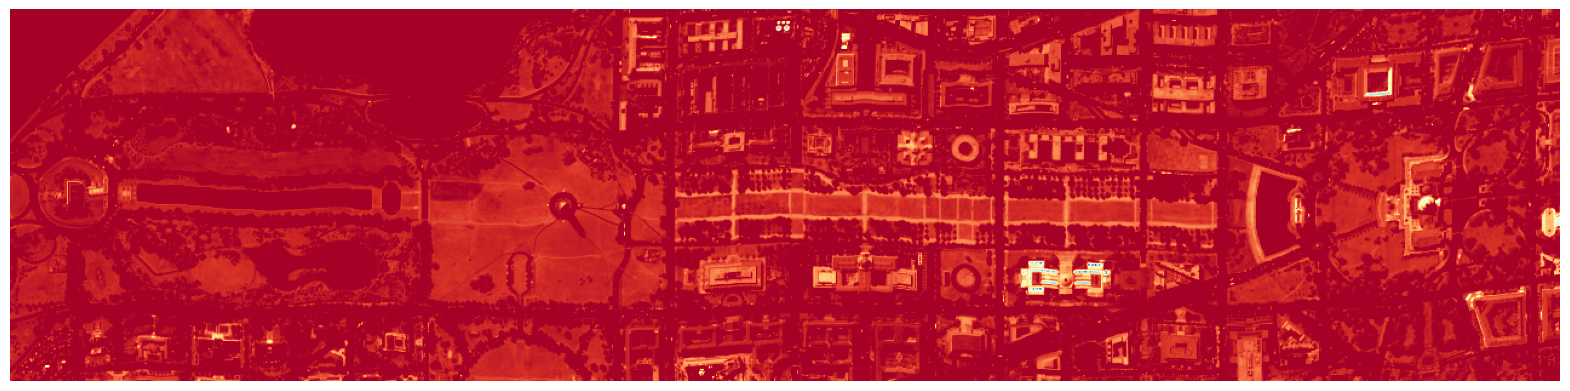

In [15]:
transformed_img = normalize(transformed_img)
show_img(transformed_img, cmap='RdYlBu')

### LDA

#### Reading `GT.tif`

The `GT.tif` contains the labels for each pixel

shpe: (1280, 307) 	 data type: uint8 	 min: 0 	 max: 253


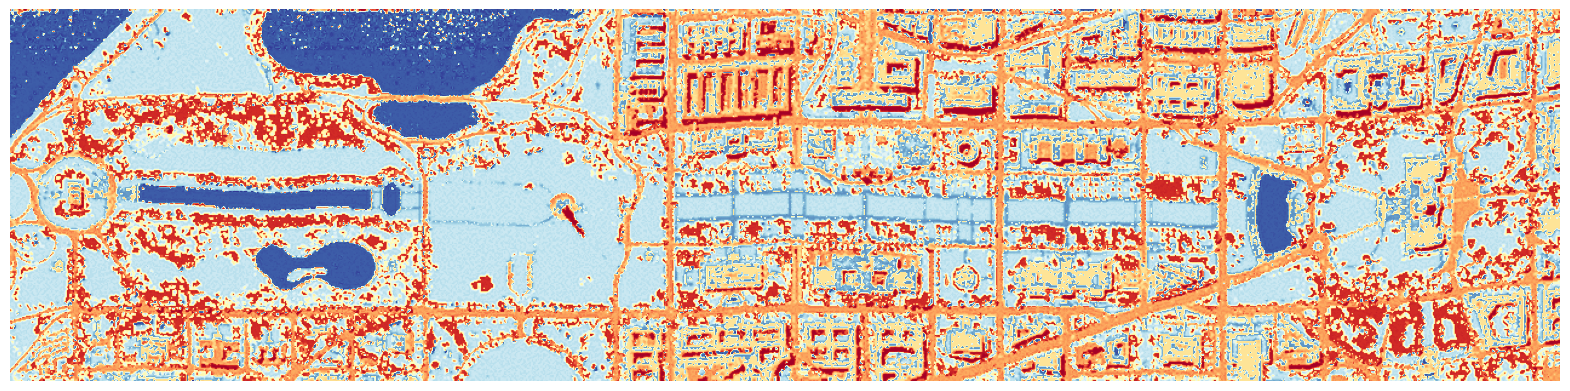

In [16]:
gt = tifffile.imread('/content/drive/MyDrive/Machine Learning/HW5/GT.tif')
print(f'shpe: {gt.shape} \t data type: {gt.dtype} \t min: {gt.min()} \t max: {gt.max()}')

show_img(gt, cmap='RdYlBu')

#### 3 Channels LDA

In [17]:
img = dc.transpose((1 , -1 , 0))
w , h , c = img.shape 
gt_w, gt_h = gt.shape
labels = gt.reshape(gt_w * gt_h)
data = img.reshape(w * h , c) 
lda = LDA(n_components=3)

transformed_data = lda.fit_transform(data, labels)
transformed_img = transformed_data.reshape(w, h, 3)
LDA_3comp = transformed_img.copy()
transformed_img.shape

(1280, 307, 3)

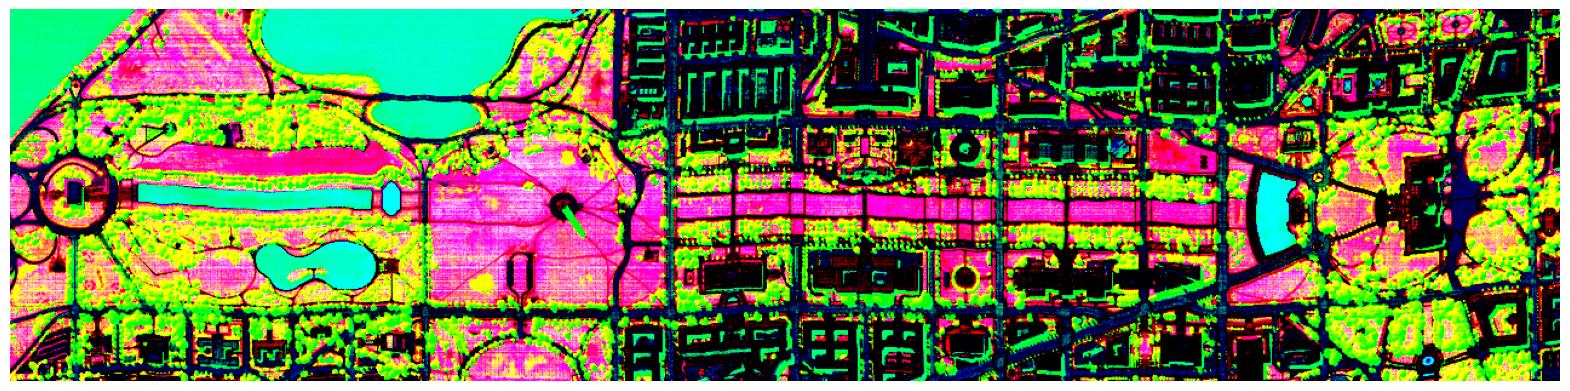

In [18]:
C1, C2, C3 = (transformed_img[:, :, 0], transformed_img[:, :, 1], transformed_img[:, :, 2])

[C1, C2, C3] = map(lambda x: normalize(x, 8.0), [C1, C2, C3])

three_channel = np.dstack((C1, C2, C3))
show_img(three_channel)

#### 1 Channel LDA

In [19]:
img = dc.transpose((1 , -1 , 0))
w , h , c = img.shape 
gt_w, gt_h = gt.shape
labels = gt.reshape(gt_w * gt_h)
data = img.reshape(w * h , c) 
lda = LDA(n_components=1)

transformed_data = lda.fit_transform(data, labels)
transformed_img = transformed_img = transformed_data.reshape(w, h, 1)
transformed_img.shape

(1280, 307, 1)

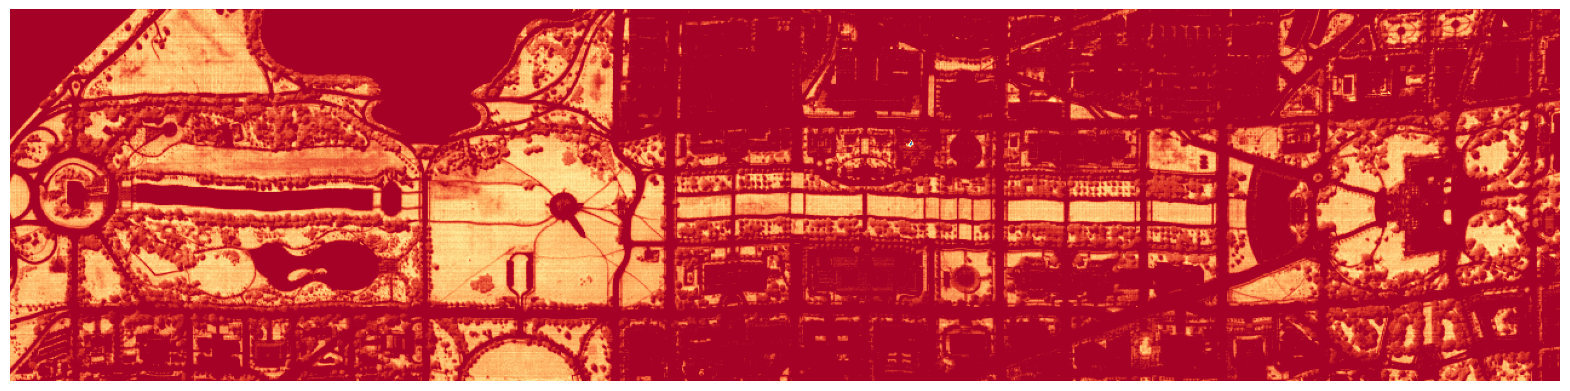

In [20]:
transformed_img = normalize(transformed_img)
show_img(transformed_img, cmap='RdYlBu')

### Comparison


*Write your answer for the last section of this problem*

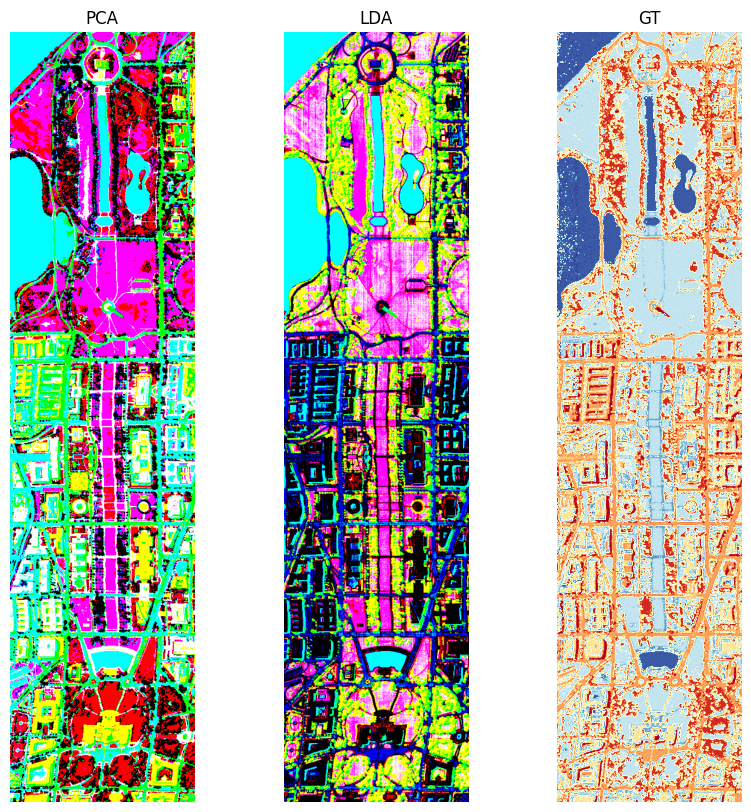

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(PCA_3comp)
ax[0].set_title('PCA')
ax[0].axis('off')


ax[1].imshow(LDA_3comp)
ax[1].set_title('LDA')
ax[1].axis('off')


ax[2].imshow(gt, cmap='RdYlBu')
ax[2].set_title('GT')
ax[2].axis('off')



plt.axis('off')
plt.show()

PCA is unsupervised dimensionality reduction. PCA does not take into class labels.Therefore, it is not specifically designed for classification tasks.

On the other hand, LDA is a supervised dimensionality reduction technique that considers class labels.LDA aims to project the data onto a lower-dimensional space while preserving class discrimination.

thus,in case of dimensionality reduction for classification tasks, LDA is generally more suitable.